In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)
df = pd.read_csv("atlas-higgs-challenge-2014-v2.csv")

In [38]:
y = df["Label"].map({"b": 0, "s": 1})
X = df.drop(columns=["Label", "Weight"])

X = X.select_dtypes(include=[np.number])

X = X.replace(-999, np.nan)
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.dtypes.unique()

np.isnan(X_train.values).sum()

0

In [40]:
np.save("data/X_train_unscaled.npy", X_train.values)
np.save("data/X_test_unscaled.npy", X_test.values)
np.save("data/y_train.npy", y_train.values)
np.save("data/y_test.npy", y_test.values)

In [42]:
X_train = np.load("data/X_train_unscaled.npy")
X_test = np.load("data/X_test_unscaled.npy")
y_train = np.load("data/y_train.npy")
y_test = np.load("data/y_test.npy")

In [44]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [45]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

In [46]:
print(classification_report(y_test, y_pred, target_names=["Background", "Signal"]))

              precision    recall  f1-score   support

  Background       1.00      1.00      1.00    107736
      Signal       1.00      1.00      1.00     55912

    accuracy                           1.00    163648
   macro avg       1.00      1.00      1.00    163648
weighted avg       1.00      1.00      1.00    163648



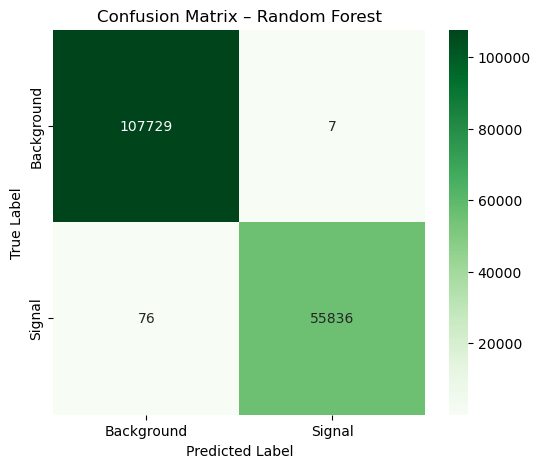

In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Background", "Signal"],
            yticklabels=["Background", "Signal"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Random Forest")

plt.savefig("results/figures/rf_confusion_matrix.png", bbox_inches="tight")
plt.show()

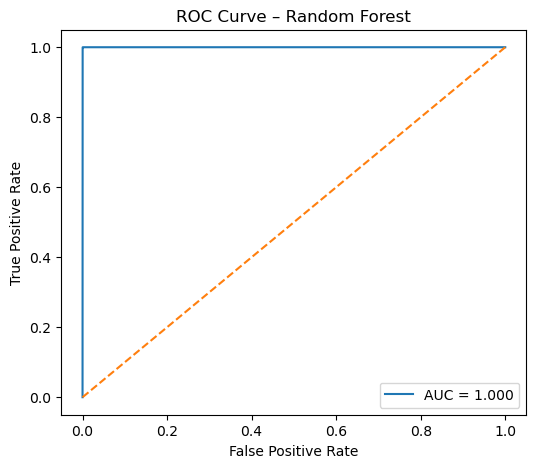

In [52]:
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()

plt.savefig("results/figures/rf_roc_curve.png", bbox_inches="tight")
plt.show()

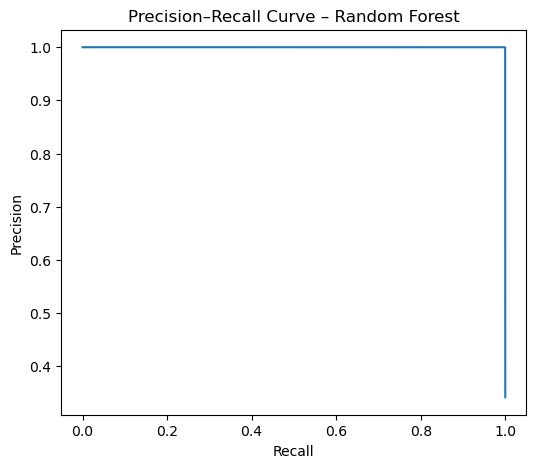

In [54]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Random Forest")

plt.savefig("results/figures/rf_pr_curve.png", bbox_inches="tight")
plt.show()